Zadanie: analiza danych
W tym module analizowaliśmy bazę danych z informacjami dotyczącymi pracowników pewnego amerykańskiego przedsiębiorstwa. Główną wagę przywiązaliśmy do stawki wynagrodzenia, jest tam jednak wiele innych obszarów, którym moglibyśmy się przyjrzeć. Jako zadanie zastanów się i postaraj się odpowiedzieć na następujące pytania:
    1. Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?
    2. Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?
    3. Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?
    4. Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?
    5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?
Użyj bazy danych znajdującej się tutaj. Przygotuj odpowiednie zestawienia i wizualizacje, a następnie sformułuj swoją opinię na temat wyżej wymienionych kwestii. Rozwiązanie prześlij Mentorowi do oceny.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [40]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


<Axes: >

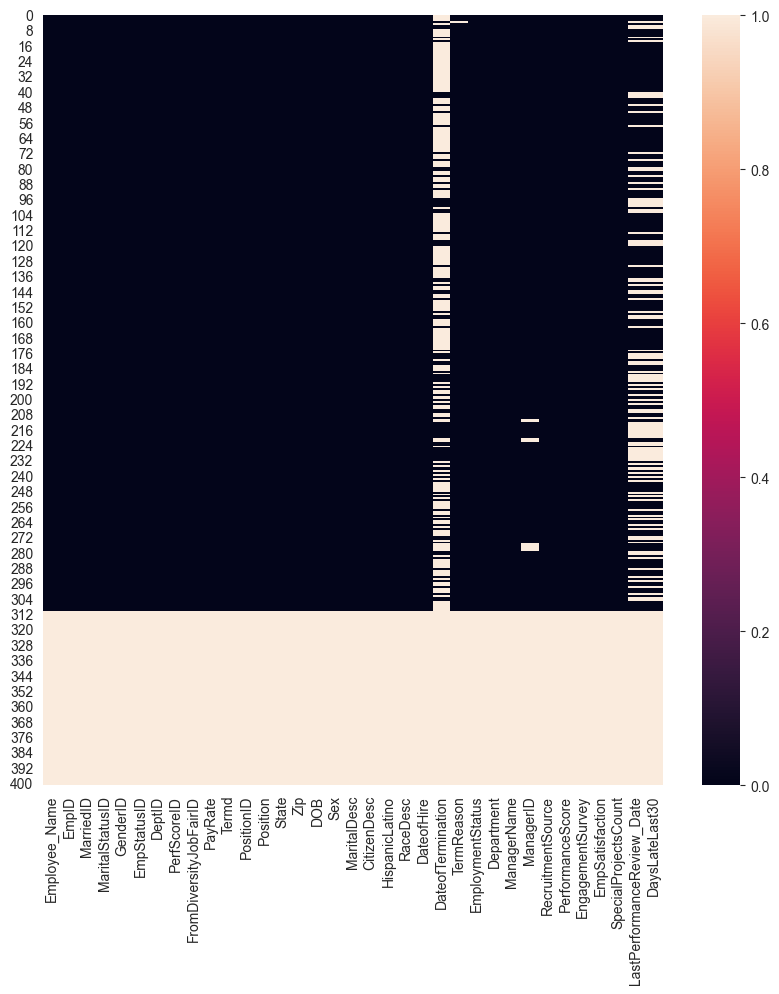

In [41]:
#heatmap
df.isnull()
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull())

In [42]:
#df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)       #wykonane usunięcie kolumn
#df.dropna(thresh=2,inplace=True)                #usunięcie wierszy
df[['DateofTermination', 'DOB', 'DateofHire']].dtypes           #sprawdzenie typu
df[['DateofTermination', 'DOB', 'DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,11/24/87,10/27/2008
1,NaN,04/26/84,1/6/2014
2,NaN,09/01/86,9/29/2014
3,04/15/15,09/16/85,2/16/2015
4,NaN,05/19/88,5/1/2015


In [43]:
#konwertowanie foramtu daty

df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

df[['DateofTermination', 'DOB', 'DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


Analiza danych z Seaborn

C:\Users\kkleps\AppData\Local\Temp\ipykernel_66368\3901548981.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PayRate'])


<Axes: xlabel='PayRate', ylabel='Density'>

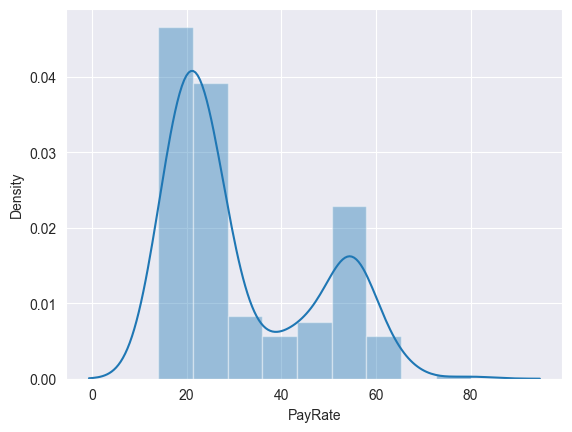

In [44]:
#ustawienie stylu wykresu         whitegrid, dark, white, ticks  
sns.set_style('darkgrid')

#ustowrzenie histogramu
sns.distplot(df['PayRate'])

C:\Users\kkleps\AppData\Local\Temp\ipykernel_66368\1296142616.py:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.05`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(df['PayRate'], shade=True, bw=.05, color="green")
C:\Users\kkleps\AppData\Local\Temp\ipykernel_66368\1296142616.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['PayRate'], shade=True, bw=.05, color="green")
C:\Users\kkleps\AppData\Local\Temp\ipykernel_66368\1296142616.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(df['PayRate'], shade=True, bw=.5, col

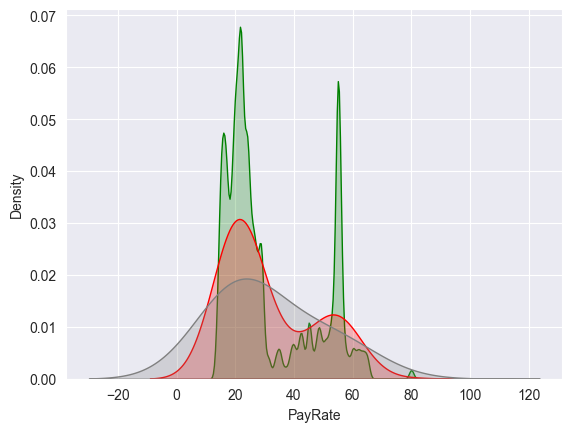

In [45]:
sns.kdeplot(df['PayRate'], shade=True, bw=.05, color="green")
sns.kdeplot(df['PayRate'], shade=True, bw=.5, color="red")
sns.kdeplot(df['PayRate'], shade=True, bw=.95, color="gray")
plt.show()

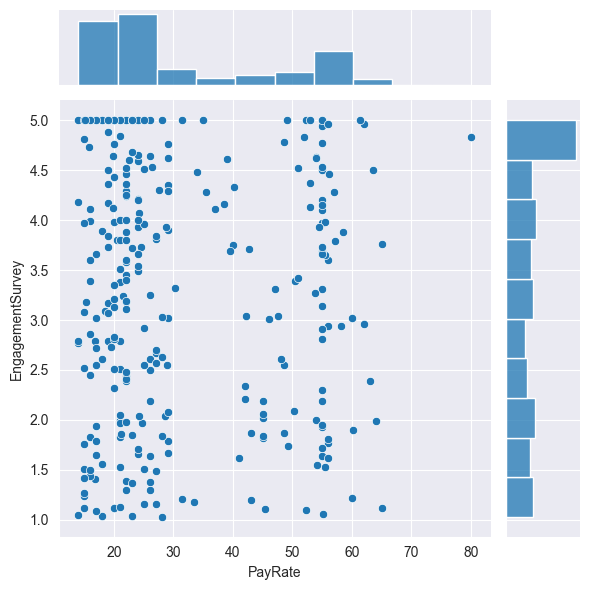

In [46]:
sns.jointplot(x='PayRate',y='EngagementSurvey',data=df)

In [47]:
#funkcja  staż pracy
import datetime as dt
def count_seniority(row):
    if pd.isnull(row['DateofTermination']):                                                                     #kod z kursu nie działą
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']
    staz = (end_date - row['DateofHire'])/np.timedelta64(1,'D') / 365
    
    return round(staz, 1)

df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

df[['DateofHire','DateofTermination','Seniority']].head()

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.9
1,2014-01-06,NaT,5.7
2,2014-09-29,NaT,5.0
3,2015-02-16,2015-04-15,0.2
4,2015-05-01,NaT,4.4


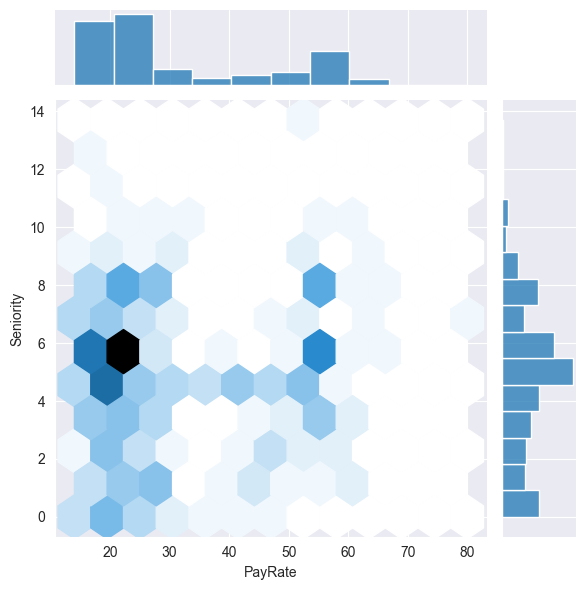

In [33]:
#zestawienie stawki wynagrodzeń ze stażem pracy
sns.jointplot(x = 'PayRate', y = 'Seniority', data = df, kind = 'hex')

In [ ]:
#wszystkie zestawienia danych obserwacji
sns.pairplot(df[df.columns[~df.columns.str.endswith('ID')]].select_dtypes(float))

Zadanie: Analiza danych

In [48]:

df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Seniority
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0,10.9
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0,5.7
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0,5.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN,0.2
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0,4.4


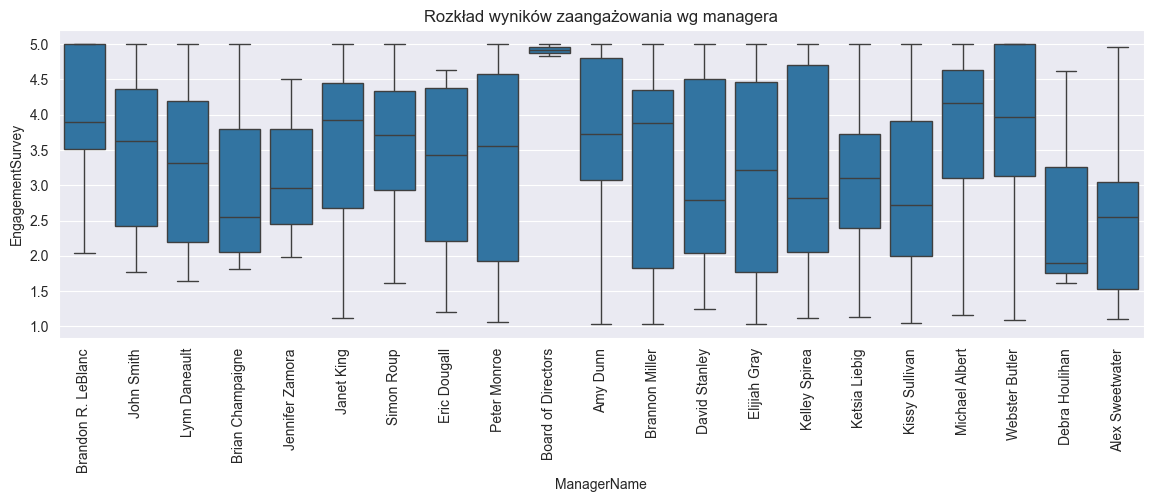

In [49]:
#zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?
plt.figure(figsize=(14, 4))
sns.boxplot(x='ManagerName', y='EngagementSurvey', data=df)
plt.xticks(rotation=90)
plt.title('Rozkład wyników zaangażowania wg managera')
plt.show()

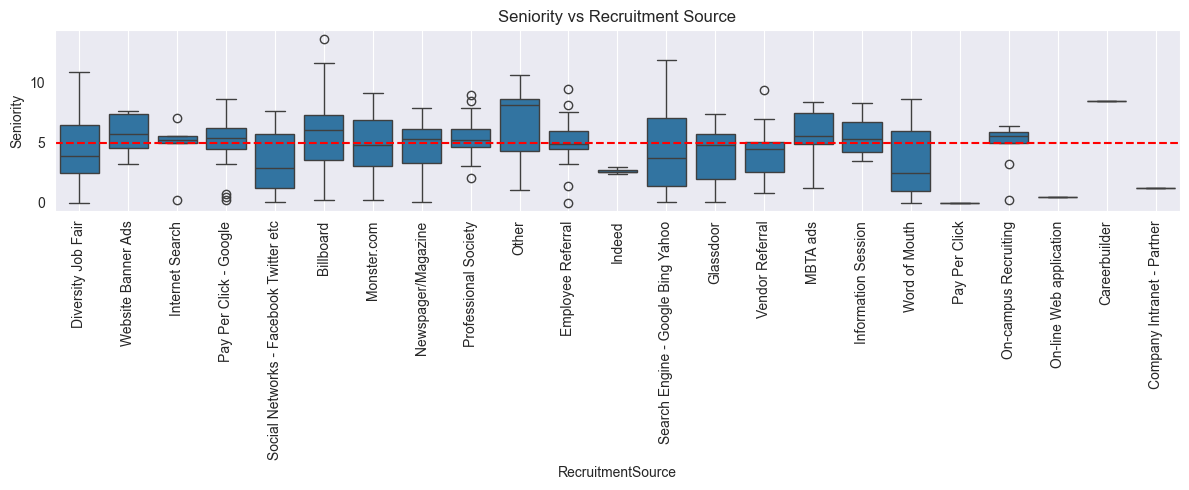

In [58]:
#Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

plt.figure(figsize=(12, 5))
sns.boxplot(x='RecruitmentSource', y='Seniority', data=df)
plt.title("Seniority vs Recruitment Source")
plt.xticks(rotation=90)
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.axhline(y=5, color = 'red', linestyle = '--')
plt.tight_layout()
plt.grid()
plt.show()

<Figure size 500x500 with 0 Axes>

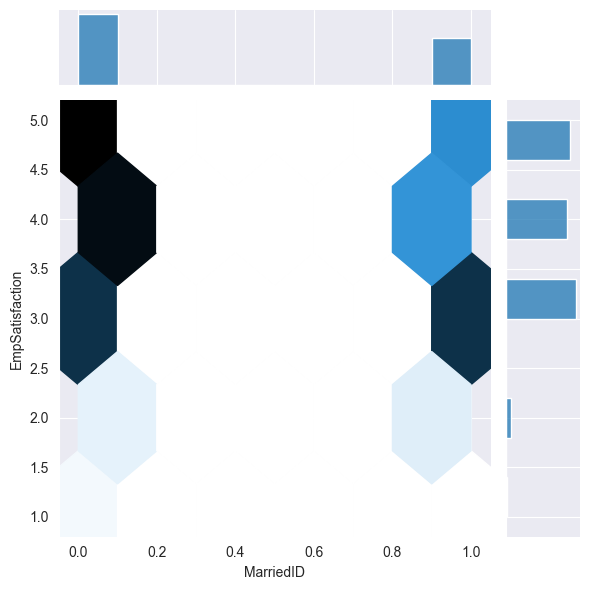

In [62]:
#Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?
plt.figure(figsize = (5,5))
sns.jointplot(x = 'MarriedID', y = 'EmpSatisfaction', data = df, kind = 'hex')


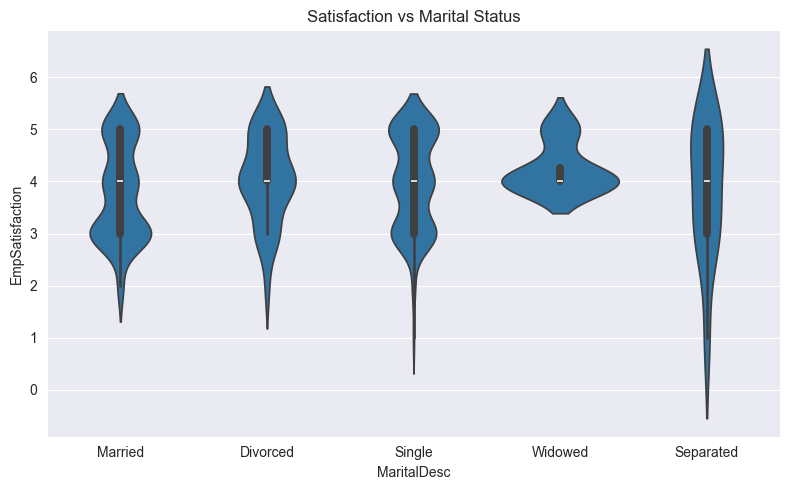

MaritalDesc
Single       137
Married      123
Divorced      30
Separated     12
Widowed        8
Name: count, dtype: int64

In [70]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='MaritalDesc', y='EmpSatisfaction', data=df)
plt.title("Satisfaction vs Marital Status")
plt.tight_layout()
plt.show()

df['MaritalDesc'].value_counts()

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Seniority', 'Age'],
      dtype='object')


<Axes: xlabel='Age', ylabel='Count'>

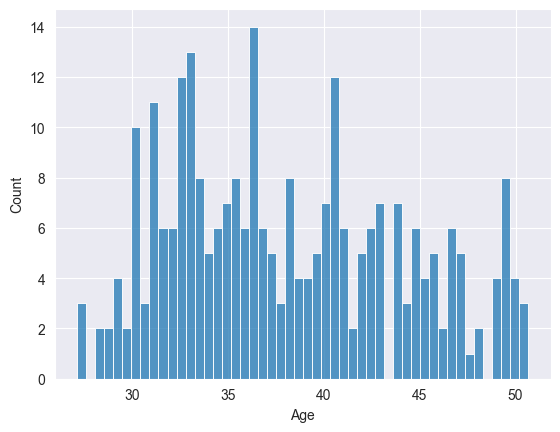

In [85]:
# 4. Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

#obliczanie wieku
difference = (dt.datetime(2019, 9, 27) - df['DOB']).dt.days
df['Age'] = difference / 365
df = df[df['Age'] >0]

print(df.columns)
sns.histplot(df['Age'], bins=50)

<Figure size 400x400 with 0 Axes>

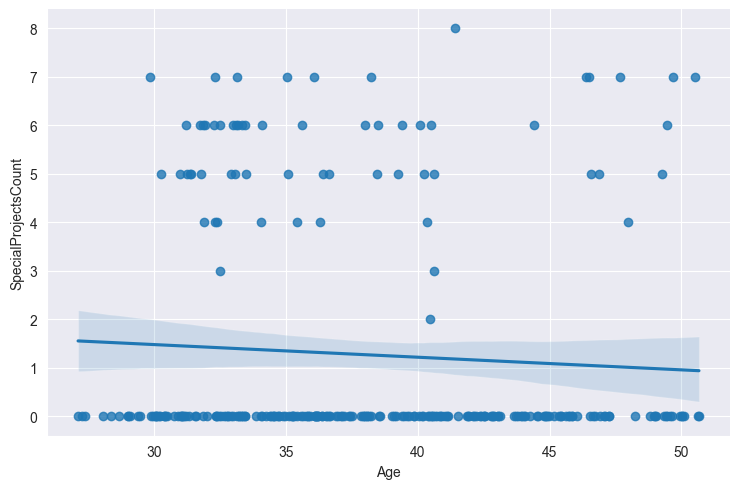

In [93]:
#5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?
plt.figure(figsize = (4,4))
sns.lmplot(x='Age', y='SpecialProjectsCount', data=df, aspect=1.5)
